# `Time Series Analysis` 

### Chapter 01: Time Series Analysis Overview

#### `1-Trends types:`

In [1]:
# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style("darkgrid")


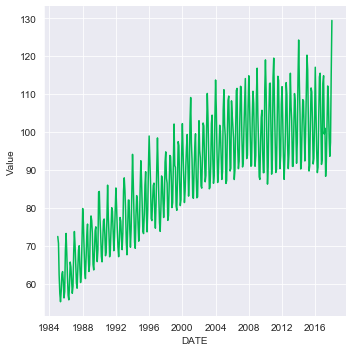

In [2]:
data = pd.read_csv(r'datasets/Electric_Production.csv')
data['DATE'] = pd.to_datetime(data['DATE'])


# Add markers and make each line have the same style
sns.relplot(x="DATE", y="Value", 
            data=data, kind="line", 
            dashes=True, color="#00BC55")

# Show plot
plt.show()

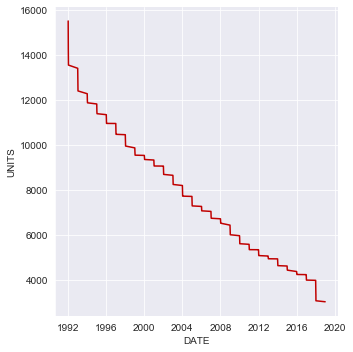

In [3]:
# importing dataset
data = pd.read_csv(r'datasets/AlcoholSale.csv')
data['DATE'] = pd.to_datetime(data['DATE'])
 
# Add markers and make each line have the same style
sns.relplot(x="DATE", y="UNITS", 
            data=data, kind="line", 
            dashes=True, color="#C00000")

# Show plot
plt.show()


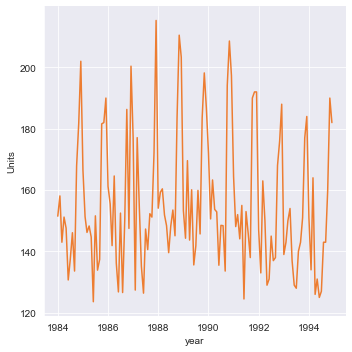

In [5]:
# importing dataset
data = pd.read_csv(r'datasets/monthly-production.csv')
 
# casting Month column to datetime object
data['year'] = pd.to_datetime(data['month'])
data['Units'] = data['monthly_production'] 

# Setting Month as index
data = data.set_index('year')
 
data = data['1984':'1994']

# Add markers and make each line have the same style
sns.relplot(x="year", y="Units", 
            data=data, kind="line", 
            dashes=True, color="#ED7D31")

# Show plot
plt.show()

#### `2-Seasonality and Residuals:`

In [133]:
import numpy as np
time = np.arange(1, 51)
trend = time * 2.75
seasonal = 100 + np.sin(time) * 10

np.random.seed(10)  # reproducible results
residual = np.random.normal(loc=0.0, scale=1, size=len(time))

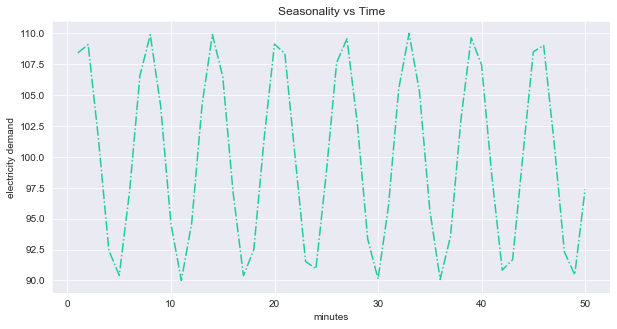

In [134]:
plt.figure(figsize=(10,5))
plt.plot(time, seasonal, '-.', c="#1FCC9E")
plt.title("Seasonality vs Time")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

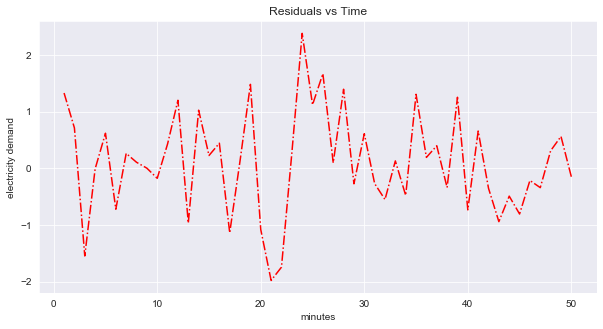

In [136]:
plt.figure(figsize=(10,5))
plt.plot(time, residual, 'r-.')
plt.title("Residuals vs Time")
plt.xlabel("minutes")
plt.ylabel("electricity demand");

#### `3-Quick overview on time series decomposition:`

In [84]:
with open("datasets/LTOTALNSA.csv", "rb") as f1:
    light_cars_sales = pd.read_csv(f1) 

light_cars_sales['DATE'] = pd.to_datetime(light_cars_sales['DATE'])
light_cars_sales.set_index("DATE", inplace=True)
light_cars_sales.rename(columns={"LTOTALNSA":"SALES"}, inplace=True)

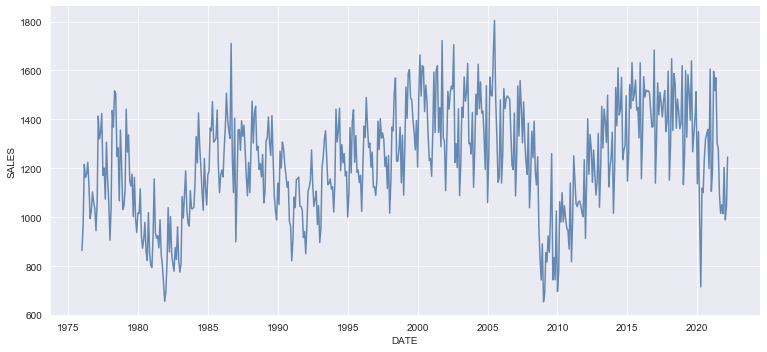

In [104]:
g = sns.relplot(x="DATE", y="SALES", 
            data=light_cars_sales, kind="line", 
            dashes=True, color="#6689B3")

g.fig.set_figwidth(12)
g.fig.set_figheight(5)
# Show plot
plt.show()

In [108]:
from statsmodels.tsa.seasonal import seasonal_decompose

ss_decomposition = seasonal_decompose(x=light_cars_sales, model='additive', period=12)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid

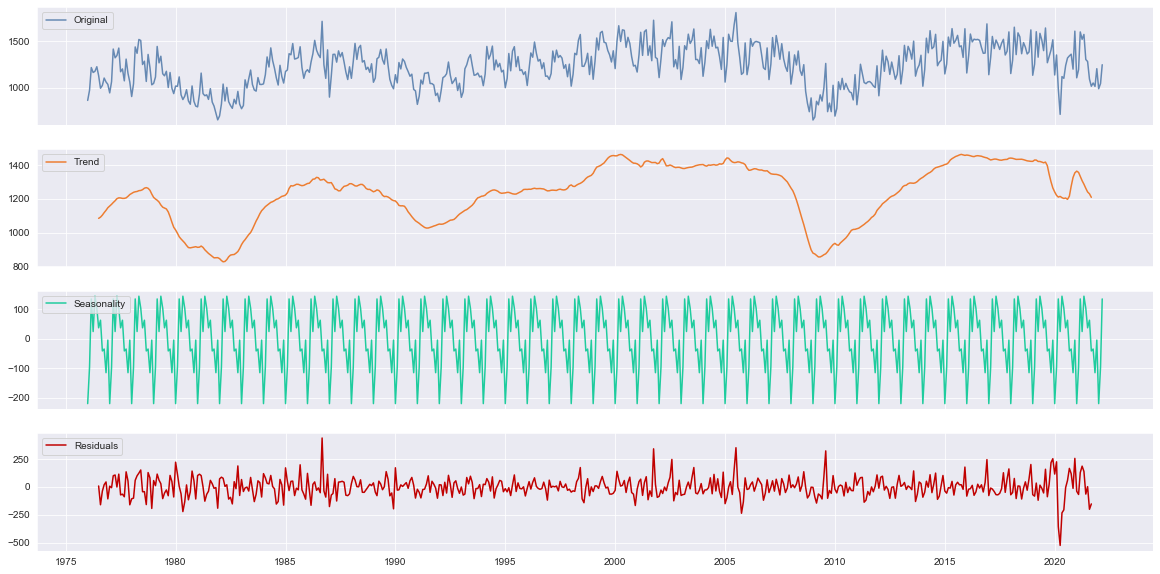

In [122]:
sns.set_style("darkgrid")
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(20)

axes[0].plot(light_cars_sales, label='Original', c="#6689B3")
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend', c="#ED7D31")
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality', c="#1FCC9E")
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals', c="#C00000")
axes[3].legend(loc='upper left');

### `Time series use cases:`

#### Pattern Analysis 

In [4]:
%matplotlib inline

import pandas as pd
import stumpy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt

plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')
steam_df = pd.read_csv("https://zenodo.org/record/4273921/files/STUMPY_Basics_steamgen.csv?download=1")

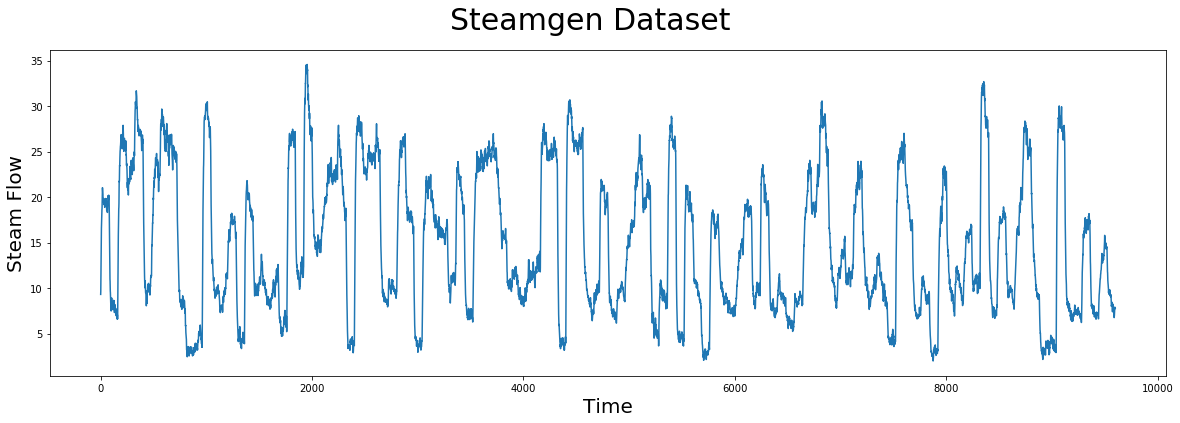

In [5]:
plt.suptitle('Steamgen Dataset', fontsize='30')
plt.xlabel('Time', fontsize ='20')
plt.ylabel('Steam Flow', fontsize='20')
plt.plot(steam_df['steam flow'].values)
plt.show()

In [6]:
m = 640
mp = stumpy.stump(steam_df['steam flow'], m)

In [7]:
motif_idx = np.argsort(mp[:, 0])[0]

print(f"The motif is located at index {motif_idx}")

The motif is located at index 643


In [8]:
nearest_neighbor_idx = mp[motif_idx, 1]

print(f"The nearest neighbor is located at index {nearest_neighbor_idx}")

The nearest neighbor is located at index 8724


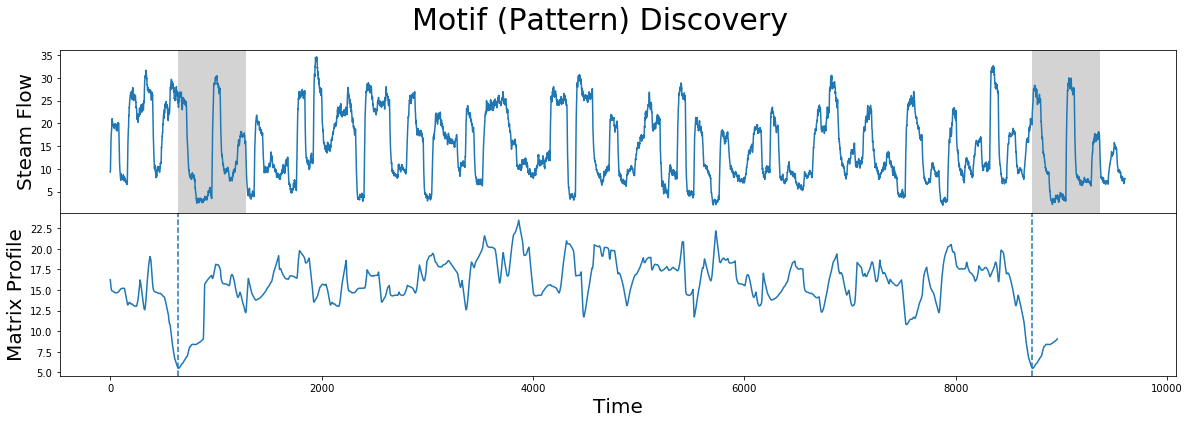

In [22]:


fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')

axs[0].plot(steam_df['steam flow'].values)
axs[0].set_ylabel('Steam Flow', fontsize='20')
rect = Rectangle((motif_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((nearest_neighbor_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=motif_idx, linestyle="dashed")
axs[1].axvline(x=nearest_neighbor_idx, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.show()

#### Anomaly Detection 

In [14]:
discord_idx = np.argsort(mp[:, 0])[-1]

print(f"The discord is located at index {discord_idx}")

The discord is located at index 3864


In [15]:
nearest_neighbor_distance = mp[discord_idx, 0]

print(f"The nearest neighbor subsequence to this discord is {nearest_neighbor_distance} units away")

The nearest neighbor subsequence to this discord is 23.476168367301963 units away


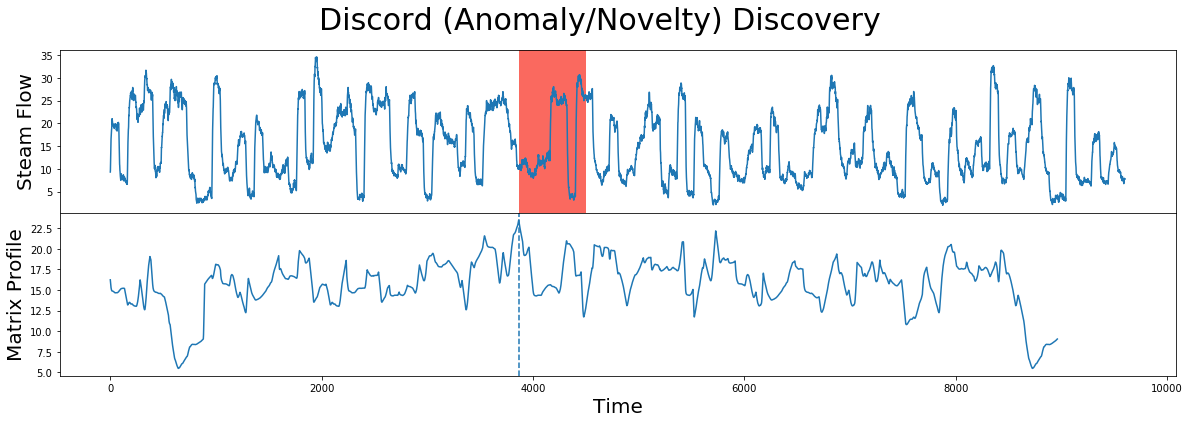

In [21]:
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Discord (Anomaly/Novelty) Discovery', fontsize='30')

axs[0].plot(steam_df['steam flow'].values,)
axs[0].set_ylabel('Steam Flow', fontsize='20')
rect = Rectangle((discord_idx, 0), m, 40, facecolor='#fa695f')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=discord_idx, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.show()